# Linear_Regression_Bike_Sharing_Assignment
##### Submitted by:
     SAIBEK VARGHESE PANICKER


# Problem Statement:
    BoomBikes, a bike-sharing service provider in the US, has experienced a decline in revenue due to the COVID-19 pandemic. They want to develop a business plan to accelerate their revenue once the lockdown ends and the economy improves. To achieve this, they have hired a consulting company to analyze a dataset on daily bike demands and identify the significant variables that affect demand for their service in the American market. The company wants to know which variables are important in predicting demand and how well they describe the bike demands.

## Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor



## Loading data and doing basic checks

In [2]:
df= pd.read_csv('day.csv')
df.shape

(730, 16)

In [3]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Removing unwanted cols
    * instant : index
    * dteday :  date which is obtained from yr and month
    * casual and registered : subsets of cnt column


In [8]:
df=df.drop(['instant','dteday', 'casual', 'registered'],1)
df.shape

C:\Users\pansaibe\AppData\Local\Temp/ipykernel_14712/1321869567.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(['instant','dteday', 'casual', 'registered'],1)


(730, 12)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [11]:
## Converting necessary cols into categorical cols:

In [12]:
df['season']=df[['season']].apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
df['yr']=df[['yr']].apply(lambda x : x.map({0:'2018',1:'2019'}))
df['weekday']=df[['weekday']].apply(lambda x : x.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}))
df['weathersit']=df[['weathersit']].apply(lambda x : x.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}))
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,12,0,fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,12,0,sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,12,0,sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [13]:
#converting month and holiday to categorical
df['mnth']=df['mnth'].astype('category')
df['holiday']=df['holiday'].astype('category')
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,12,0,fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,12,0,sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,12,0,sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   yr          730 non-null    object  
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    object  
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(2), float64(4), int64(2), object(4)
memory usage: 59.1+ KB


In [15]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,12,0,fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,12,0,sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,12,0,sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


## Exploratory data analysis

### Univariate analysis

### Boxplot

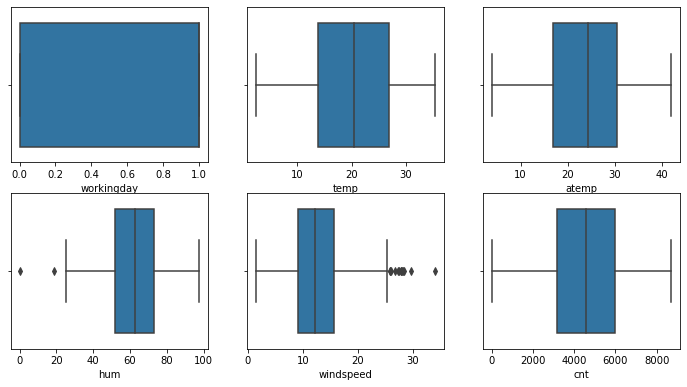

In [16]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,20), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(include='number'):
    if plotnumber<=10 :     
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [17]:
#Only few features have outliers

### Distribution plot

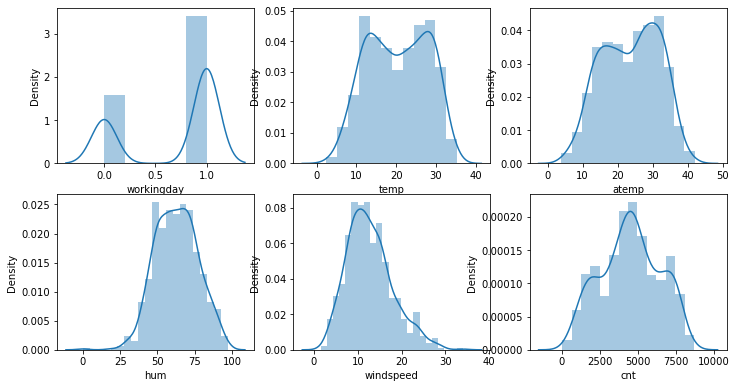

In [18]:
plt.figure(figsize=(12,20), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(include='number'):
    if plotnumber<=10 :     
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column],kde=True)
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

### Countplot

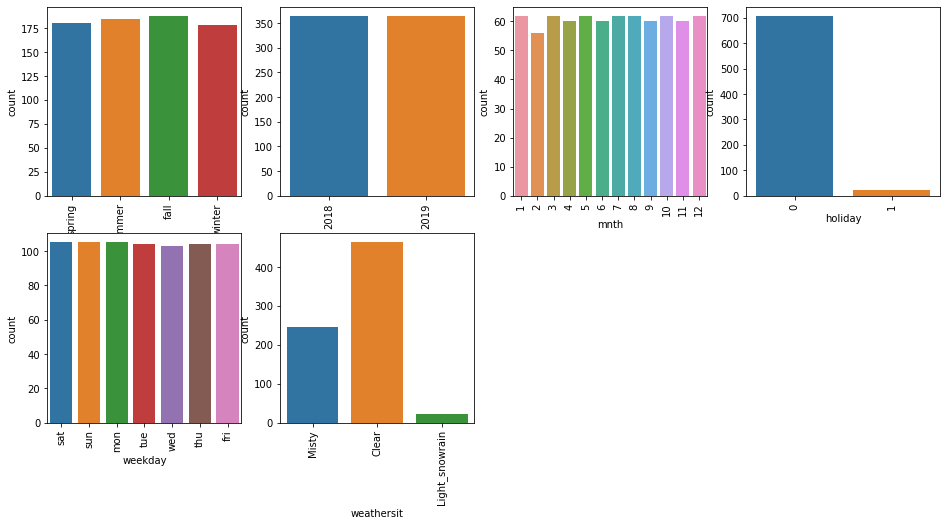

In [19]:
plt.figure(figsize=(16,16), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(exclude='number'):
    if plotnumber<=29 :     # as there are 9 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation = 90)
        
    plotnumber+=1
plt.show()

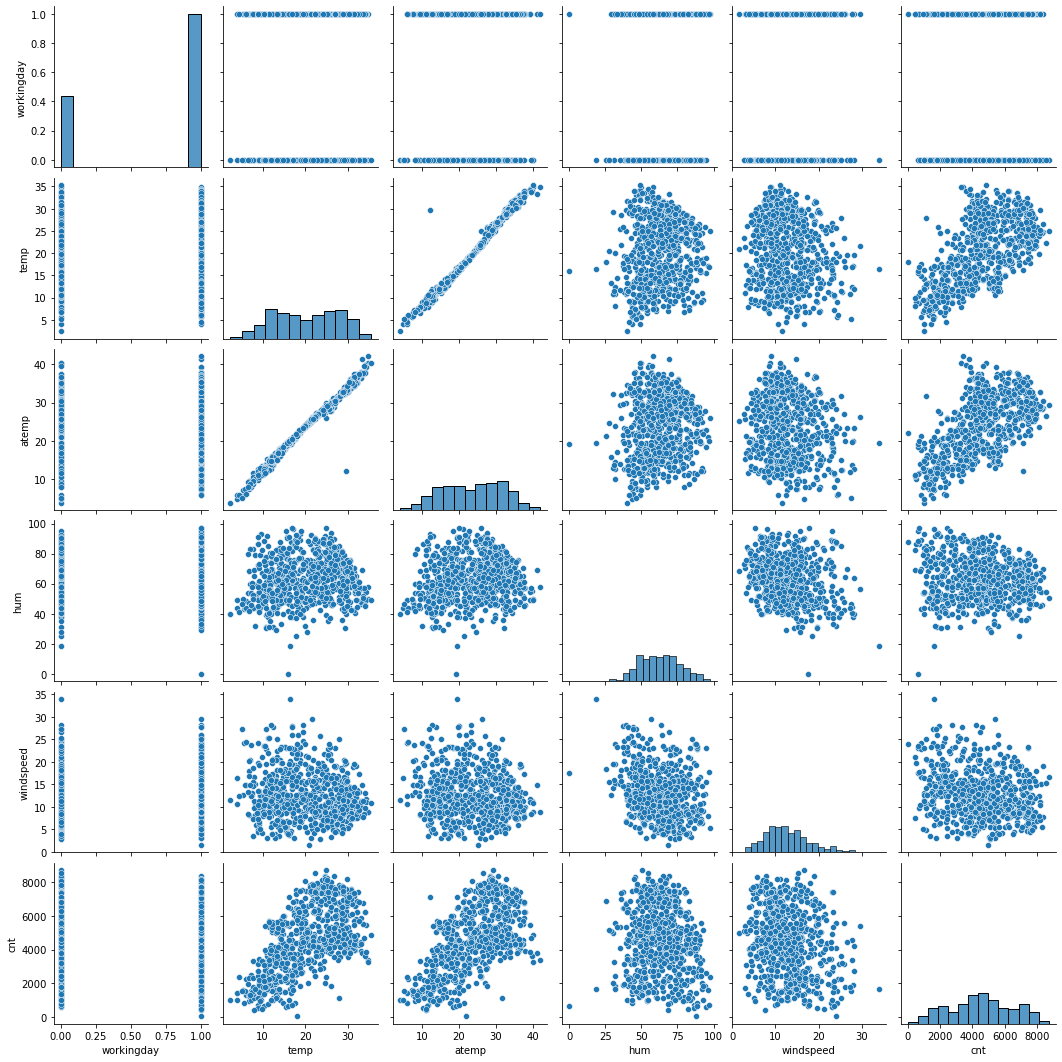

In [20]:
sns.pairplot(df)
plt.show()

### EDA with target variable (Bivariate analysis)

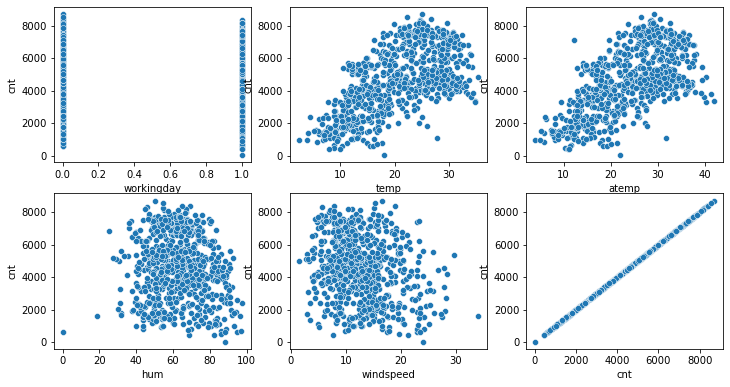

In [21]:
plt.figure(figsize=(12,20), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(include='number'):
    if plotnumber<=10 :     
        ax = plt.subplot(6,3,plotnumber)
        sns.scatterplot(x=df[column],y=df['cnt'])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

### Temp has a good linear relation with the target variable

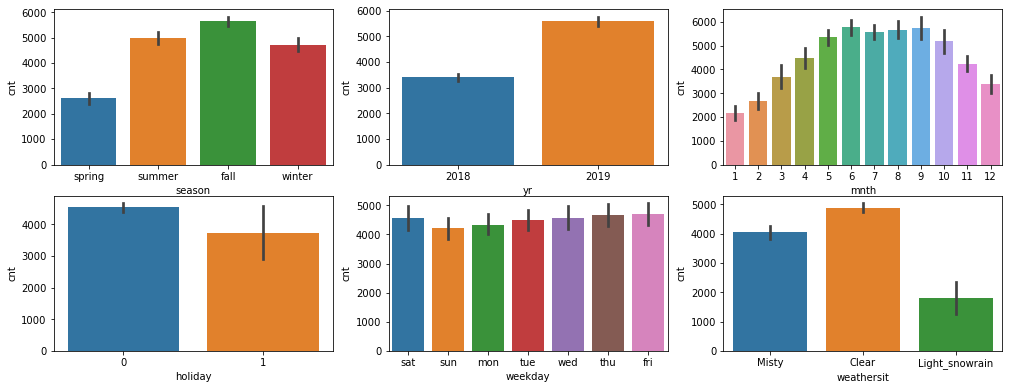

In [22]:
plt.figure(figsize=(17,20), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(exclude='number'):
    if plotnumber<=10 :     
        ax = plt.subplot(6,3,plotnumber)
        sns.barplot(x=df[column],y=df['cnt'])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

### It is observed that:
    1. Summer and fall season have more bike users.
    2. More bikes are used on non holidays.
    3. more users on clear weather
    4. june to september have more users.

<AxesSubplot:>

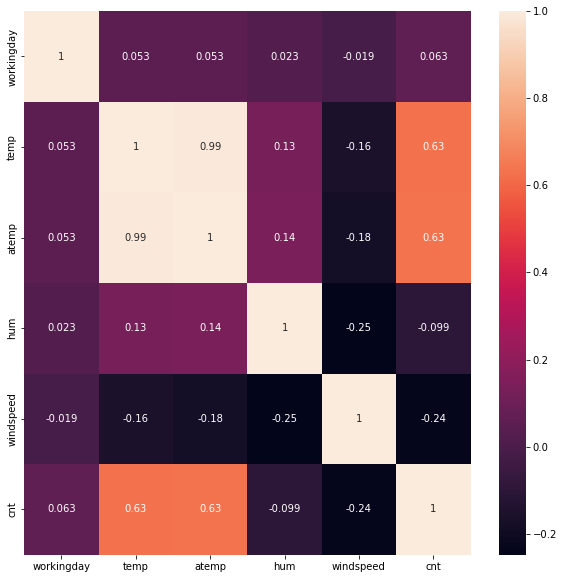

In [23]:
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(10)
x = df.corr()
sns.heatmap(x, annot = True)

In [24]:
#temp and atemp showing the same charateristics taking only temp to consideration
df=df.drop(['atemp'],1)
df.shape

(730, 11)

## Encoding the categorical variables

In [25]:
list_obj=list(df.select_dtypes(exclude='number').columns)
list_obj

['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']

In [26]:
df[list_obj]

,season,yr,mnth,holiday,weekday,weathersit
0,spring,2018,1,0,sat,Misty
1,spring,2018,1,0,sun,Misty
2,spring,2018,1,0,mon,Clear
3,spring,2018,1,0,tue,Clear
4,spring,2018,1,0,wed,Clear
...,...,...,...,...,...,...
725,spring,2019,12,0,thu,Misty
726,spring,2019,12,0,fri,Misty
727,spring,2019,12,0,sat,Misty
728,spring,2019,12,0,sun,Clear


In [27]:
dummy=pd.get_dummies(df[list_obj],prefix=list_obj,drop_first=True)
dummy

,season_spring,season_summer,season_winter,yr_2019,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,mnth_12,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
726,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
727,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
728,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [28]:
df=pd.concat([df,dummy],axis=1)
df=df.drop(list_obj,axis=1)
df.shape

(730, 29)

In [29]:
df

,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_2,...,mnth_12,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,10.420847,65.2917,23.458911,2114,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
726,1,10.386653,59.0000,10.416557,3095,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
727,0,10.386653,75.2917,8.333661,1341,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
728,0,10.489153,48.3333,23.500518,1796,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


## Modeling

In [30]:
#Scaling the feautures to standardise the values
scalar=MinMaxScaler()

In [31]:
#features to be scaled
num_var=['temp', 'hum', 'windspeed','cnt']


In [32]:
df

,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_2,...,mnth_12,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,10.420847,65.2917,23.458911,2114,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
726,1,10.386653,59.0000,10.416557,3095,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
727,0,10.386653,75.2917,8.333661,1341,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
728,0,10.489153,48.3333,23.500518,1796,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [33]:
#splitting the data into train and test
df_train,df_test=train_test_split(df,test_size=0.2,random_state=10)

In [34]:
df_train.shape

(584, 29)

In [35]:
#applying minmax scaler
df_train[num_var]=scalar.fit_transform(df_train[num_var])



In [36]:
df_train.columns

Index(['workingday', 'temp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'holiday_1', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [37]:
#creating x_train and y_train
Y_train =df_train[['cnt']]
X_train =df_train.drop(['cnt'],1)

In [38]:
#adding constant for linear regression
X_train_sm=sm.add_constant(X_train)

In [39]:
#fitting the model and checking the summary
lr=sm.OLS(Y_train,X_train_sm)
lr=lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          1.21e-207
Time:                        21:43:34   Log-Likelihood:                 594.53
No. Observations:                 584   AIC:                            -1133.
Df Residuals:                     556   BIC:                            -1011.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2635      0.032      8.215      0.000       0.200       0.326
workingday                    0.0912      0.011      8.046      0.000       0.069       0.113
temp                          0.4414      0.043     10.319      0.000       0.357       0.525
hum                          -0.1761      0.037     -4.813      0.000      -0.248      -0.104
windspeed                    -0.1809      0.026     -6.926      0.000      -0.232      -0.130
season_spring                -0.1050      0.027     -3.868      0.000      -0.158      -0.052
season_summer                -0.0065      0.024     -0.276      0.782      -0.053       0.040
season_winter                 0.0772      0.025      3.137      0.002       0.029       0.126
yr_2019                       0.2330      0.008     30.576      0.000       0.218       0.248
mnth_2                        0.0130      0.019      0.684      0.494      -0.024       0.051
mnth_3                        0.0641      0.021      2.994      0.003       0.022       0.106
mnth_4                        0.0493      0.032      1.547      0.122      -0.013       0.112
mnth_5                        0.0711      0.034      2.065      0.039       0.003       0.139
mnth_6                        0.0403      0.036      1.106      0.269      -0.031       0.112
mnth_7                       -0.0387      0.041     -0.940      0.348      -0.120       0.042
mnth_8                        0.0185      0.039      0.471      0.638      -0.059       0.096
mnth_9                        0.0877      0.035      2.541      0.011       0.020       0.155
mnth_10                       0.0434      0.031      1.380      0.168      -0.018       0.105
mnth_11                      -0.0214      0.030     -0.722      0.471      -0.080       0.037
mnth_12                      -0.0100      0.023     -0.430      0.667      -0.056       0.036
holiday_1                     0.0245      0.020      1.211      0.226      -0.015       0.064
weekday_mon                  -0.0266      0.014     -1.867      0.062      -0.055       0.001
weekday_sat                   0.0979      0.012      7.855      0.000       0.073       0.122
weekday_sun                   0.0499      0.013      3.841      0.000       0.024       0.075
weekday_thu                  -0.0061      0.014     -0.431      0.667      -0.034       0.022
weekday_tue                  -0.0111      0.014     -0.793      0.428      -0.038       0.016
weekday_wed                  -0.0039      0.014     -0.280      0.780      -0.031       0.024
weathersit_Light_snowrain    -0.2278      0.024     -9.400      0.000      -0.275      -0.180
weathersit_Misty             -0.0498      0.010     -4.995      0.000      -0.069      -0.030
===========================================================================

## Recursive Feature elimination:
    * used to eliminate the variables that dont play much importance in the model

In [40]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train,Y_train)

rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train,Y_train)

In [41]:
rfe_df = pd.DataFrame({'Features': X_train.columns, 'status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking',ascending=False)

,Features,status,Ranking
25,weekday_wed,False,14
23,weekday_thu,False,13
5,season_summer,False,12
24,weekday_tue,False,11
18,mnth_12,False,10
17,mnth_11,False,9
22,weekday_sun,False,8
8,mnth_2,False,7
20,weekday_mon,False,6
14,mnth_8,False,5


In [42]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_3', 'mnth_5', 'mnth_7', 'mnth_9', 'mnth_10', 'holiday_1',
       'weekday_sat', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_mon', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [44]:
#taking only the required cols
X_train_rfe = X_train[col]

### VIF

In [45]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [46]:
calculateVIF(X_train_rfe)

,Features,VIF
1,hum,23.17
0,temp,15.87
2,windspeed,5.01
4,season_winter,2.81
3,season_spring,2.80
14,weathersit_Misty,2.25
5,yr_2019,1.99
10,mnth_10,1.58
8,mnth_7,1.49
7,mnth_5,1.36


In [47]:
# humidity has high VIF so dropping it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [48]:
X_train_sm_1=sm.add_constant(X_train_new)
lr=sm.OLS(Y_train,X_train_sm_1)
lr=lr.fit()
lr.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          2.02e-211
Time:                        21:43:35   Log-Likelihood:                 569.31
No. Observations:                 584   AIC:                            -1109.
Df Residuals:                     569   BIC:                            -1043.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2603      0.024     11.067      0.000       0.214       0.307
temp                          0.4260      0.029     14.548      0.000       0.368       0.484
windspeed                    -0.1389      0.025     -5.503      0.000      -0.188      -0.089
season_spring                -0.1287      0.015     -8.858      0.000      -0.157      -0.100
season_winter                 0.0298      0.014      2.164      0.031       0.003       0.057
yr_2019                       0.2383      0.008     30.842      0.000       0.223       0.253
mnth_3                        0.0517      0.014      3.616      0.000       0.024       0.080
mnth_5                        0.0236      0.015      1.599      0.110      -0.005       0.053
mnth_7                       -0.0622      0.017     -3.618      0.000      -0.096      -0.028
mnth_9                        0.0588      0.015      3.931      0.000       0.029       0.088
mnth_10                       0.0524      0.017      3.059      0.002       0.019       0.086
holiday_1                    -0.0752      0.022     -3.452      0.001      -0.118      -0.032
weekday_sat                   0.0230      0.011      2.088      0.037       0.001       0.045
weathersit_Light_snowrain    -0.2807      0.022    -12.783      0.000      -0.324      -0.238
weathersit_Misty             -0.0766      0.008     -9.232      0.000      -0.093      -0.060
==============================================================================
Omnibus:                      101.254   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.604
Skew:                          -0.883   Prob(JB):                     1.15e-56
Kurtosis:                       5.733   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# pvalue is high for month 5 so dropping it
X_train_new = X_train_new.drop(['mnth_5'], axis = 1)

In [91]:
X_train_sm_1=sm.add_constant(X_train_new)
lr=sm.OLS(Y_train,X_train_sm_1)
lr=lr.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     219.6
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          4.77e-212
Time:                        21:57:25   Log-Likelihood:                 568.00
No. Observations:                 584   AIC:                            -1108.
Df Residuals:                     570   BIC:                            -1047.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [51]:
calculateVIF(X_train_new)

,Features,VIF
0,temp,5.17
1,windspeed,4.99
4,yr_2019,1.99
3,season_winter,1.92
2,season_spring,1.84
8,mnth_10,1.55
12,weathersit_Misty,1.54
6,mnth_7,1.38
7,mnth_9,1.25
5,mnth_3,1.22


In [52]:
y_train_pred = lr.predict(X_train_sm_1)
r2_score(Y_train, y_train_pred)

0.8335816291272959

In [53]:
lr.params

const                        0.265859
temp                         0.427108
windspeed                   -0.140767
season_spring               -0.133342
season_winter                0.024898
yr_2019                      0.238140
mnth_3                       0.049242
mnth_7                      -0.068126
mnth_9                       0.054175
mnth_10                      0.051681
holiday_1                   -0.075356
weekday_sat                  0.022614
weathersit_Light_snowrain   -0.281212
weathersit_Misty            -0.075806
dtype: float64

## Calculating the residuals

In [54]:
train_y=y_train_pred.to_frame()

In [55]:
Train=pd.concat([Y_train,train_y],axis=1)
Train

,cnt,0
176,0.607800,0.575349
172,0.515992,0.581176
142,0.489185,0.433393
237,0.533709,0.589061
531,0.883571,0.789446
...,...,...
369,0.373907,0.449439
320,0.348711,0.283198
527,0.569489,0.688663
125,0.527612,0.429663


In [56]:
Train.rename(columns={0:'cnt_pred'},inplace=True)
Train.reset_index(drop=True)

,cnt,cnt_pred
0,0.607800,0.575349
1,0.515992,0.581176
2,0.489185,0.433393
3,0.533709,0.589061
4,0.883571,0.789446
...,...,...
579,0.373907,0.449439
580,0.348711,0.283198
581,0.569489,0.688663
582,0.527612,0.429663


In [57]:
Train['error']=Train['cnt']-Train['cnt_pred']
Train

,cnt,cnt_pred,error
176,0.607800,0.575349,0.032451
172,0.515992,0.581176,-0.065184
142,0.489185,0.433393,0.055793
237,0.533709,0.589061,-0.055351
531,0.883571,0.789446,0.094125
...,...,...,...
369,0.373907,0.449439,-0.075532
320,0.348711,0.283198,0.065513
527,0.569489,0.688663,-0.119174
125,0.527612,0.429663,0.097949


<AxesSubplot:xlabel='error', ylabel='Count'>

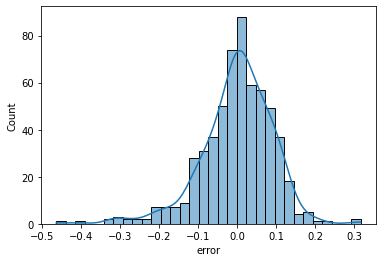

In [58]:
sns.histplot(Train.error,kde=True)

#### Errors are normally distributed

## Applying model on  TEST data and checking the r2 value

In [59]:
df_test[num_var] = scalar.transform(df_test[num_var])

In [60]:
y_test = df_test.pop('cnt')
X_test = df_test


In [61]:
X_test

,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_2,mnth_3,...,mnth_12,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
566,0,0.668758,0.889889,0.393568,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
374,1,0.310971,0.664804,0.340487,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
181,1,0.826591,0.407455,0.165370,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,1,0.734175,0.585689,0.476922,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
233,1,0.788172,0.483290,0.524373,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,1,0.171197,0.512798,0.301676,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
705,1,0.326094,0.785776,0.223077,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
261,1,0.610610,0.709512,0.266662,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
579,1,0.880586,0.660668,0.398705,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [63]:
y_test_pred = lr.predict(X_test_new)

In [64]:
r2=r2_score(y_test,y_test_pred)
r2

0.8254136872386755

In [65]:
mean_absolute_error(y_test,y_test_pred)

0.06932357837577334

In [66]:
X_test_new.shape

(146, 14)

In [67]:
X_test_new.shape[0]

146

In [68]:
n = len(y_test)
p = len(X_test_new.columns) - 1


In [69]:
adj_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [70]:
adj_r_squared

0.808219580678848

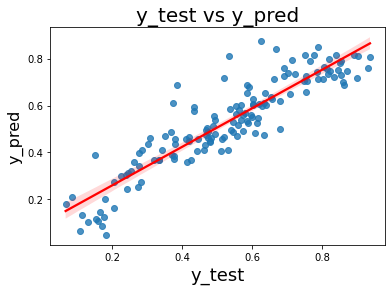

In [71]:
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True,line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


## RESULTS:

#### TRAIN :
    * R2 : 0.84
    * Adjusted R2 : 0.83
    
#### TEST :
    * R2 : 0.825
    * Adjusted R2 : 0.81
    * MAE : 0.0693